In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [47]:
points_2 = np.loadtxt("../points/points_sobol2_l2.txt")
points_4 = np.loadtxt("../points/points_sobol2_l4.txt")
points_6 = np.loadtxt("../points/points_sobol2_l6.txt")
points_8 = np.loadtxt("../points/points_sobol2_l8.txt")
points_10 = np.loadtxt("../points/points_sobol2_l10.txt")

halton_points_2 = np.loadtxt("../points/halton_points_l2.txt")
halton_points_4 = np.loadtxt("../points/halton_points_l4.txt")
halton_points_6 = np.loadtxt("../points/halton_points_l6.txt")
halton_points_8 = np.loadtxt("../points/halton_points_l8.txt")
halton_points_10 = np.loadtxt("../points/halton_points_l10.txt")

In [60]:
def test (x,s):
    f = 1.0
    #s = len(x)
    for i in range(s):
        f *= (1 - 0.1*(x[i]-0.5)/((i+1)**2))
        #f *= (1- (x[i]-0.5) * math.exp(-0.16*i))
    return f

In [61]:
def error(points, s):
    exp = 0.0
    err = 0
    for i in range(len(points)):
        exp += test(points[i,:], s)
    exp /= len(points)
    return abs(exp - 1.)

In [62]:
s=100

err2 = error(points_2,s)
err4 = error(points_4,s)
err6 = error(points_6,s)
err8 = error(points_8,s)
err10 = error(points_10,s)

halton_err2 = error(halton_points_2,s)
halton_err4 = error(halton_points_4,s)
halton_err6 = error(halton_points_6,s)
halton_err8 = error(halton_points_8,s)
halton_err10 = error(halton_points_10,s)

err = np.array([err2, err4, err6, err8, err10])

halton_err = np.array([halton_err2, halton_err4, halton_err6, halton_err8, halton_err10])

num = np.array([2.**2, 2.**4, 2.**6, 2.**8, 2.**10])

c=0.01

rate_d1 =  c*num**(-1)
rate_d2 =  c*num**(-2)

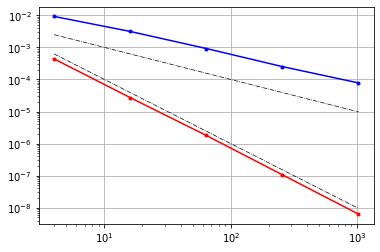

In [63]:
fig, ax = plt.subplots()

ax.loglog(num, err,'r.')
ax.loglog(num, err,'r-')
ax.loglog(num, halton_err,'b.')
ax.loglog(num, halton_err,'b-')
ax.loglog(num, rate_d1,'k-.',lw=0.7)
ax.loglog(num, rate_d2,'k-.',lw=0.7)

ax.grid()

plt.show()